In [2]:
%pylab inline
import statistician as s
import GPy
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


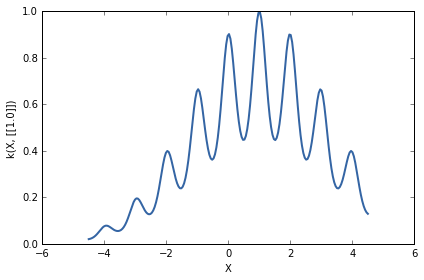

(495, 1) (495, 1)


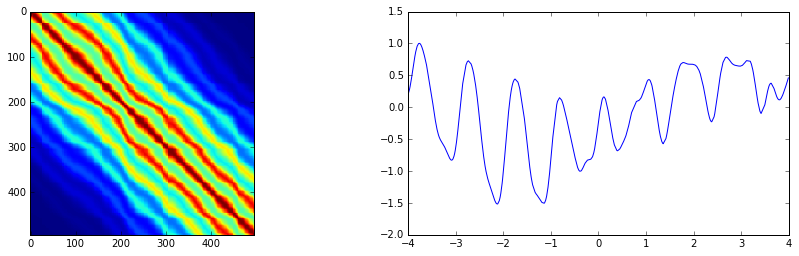

In [61]:
n = poisson(500); X = rand(n)*8 - 4; X.sort()
k = GPy.kern.RBF(input_dim=1, lengthscale=2.2)
#k = GPy.kern.Brownian(1, 0.5)
#k += GPy.kern.PeriodicExponential(1)
k *= GPy.kern.StdPeriodic(input_dim=1, lengthscale=0.8)
k.plot()

show()
X = X.reshape(-1,1)
mu = np.zeros(n)# vector of the means
C = k.K(X,X)# covariance matrix
y = np.random.multivariate_normal(mu,C).reshape(-1,1)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(C); ax2.plot(X,y); f.set_figwidth(15)
print(X.shape, y.shape)

In [62]:
# save dataset
ds_name = 'RBF*Per'

import time

for i in list(range(2,-1,-1)):
    print('\rsave in:',i,end='')
    time.sleep(1)

# save stuff
tables = {'X' : X, 'y' : y}
ds = s.DataSet(ds_name, tables)
ds.meta['kernel'] = str(k)
ds.save()
print('\nsaved!!')

save in: 0
saved!!


In [63]:
m = GPy.models.GPRegression(X,y, k)

In [75]:
m.size

6

5

In [72]:
import numpy

In [ ]:
numpy.VisibleDeprecationWarning